## Import Library

In [2]:
## import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [3]:
# Load the Dataset from sklearn
iris = datasets.load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Convert Sklearn dataset into Dataframe

In [4]:
# Convert sklearn dataset into Dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Appemdig label to the Dataframe
df["target"] = iris.target

# View the converted Dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Dataset Description

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
from IPython.display import Image
Image(url= "IRIS_Flower.png", width=700, height=600)

### Sneak Peak Data

In [7]:
# Return the First n rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Return the last n rows
df.tail()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
# Number of rows and columns in the dataset
df.shape


(150, 5)

In [10]:
# General information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## Handling Missing Values

In [13]:
# checks the null values and returns the sum of it
# ... Your answer here ...
# Checks for null values in the dataset
missing_values = df.isnull().sum()

# Display the sum of missing values
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Check Randomness of the Dataframe


In [14]:
# Shuffle the dataset to check randomness
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first 5 rows
print(df_shuffled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.1               2.8                4.7               1.2   
1                5.7               3.8                1.7               0.3   
2                7.7               2.6                6.9               2.3   
3                6.0               2.9                4.5               1.5   
4                6.8               2.8                4.8               1.4   

   target  
0       1  
1       0  
2       2  
3       1  
4       1  


In [ ]:
# Datafram before sorting
print("Before sorting")
df

Before sorting


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Sorting on Sepal width
df.sort_values("sepal width (cm)", axis = 0,
                 inplace = True, na_position ='last')

# Dataframe After Sorting
print("Afore sorting")
df



Afore sorting


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
62,6.0,2.2,4.0,1.0,1
119,6.0,2.2,5.0,1.5,2
68,6.2,2.2,4.5,1.5,1
41,4.5,2.3,1.3,0.3,0
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,0
14,5.8,4.0,1.2,0.2,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


### Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='count'>

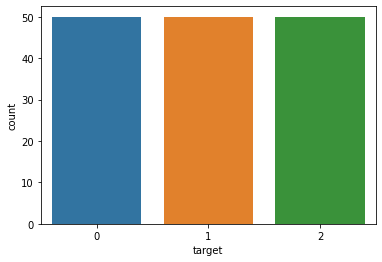

In [ ]:
# Univariate analysis on targetnfeature.
sns.countplot(df['target'])

- Here all the classes in target feature having equal number of counts. Hence it's advisable to choose this dataset.

<AxesSubplot:xlabel='sepal length (cm)'>

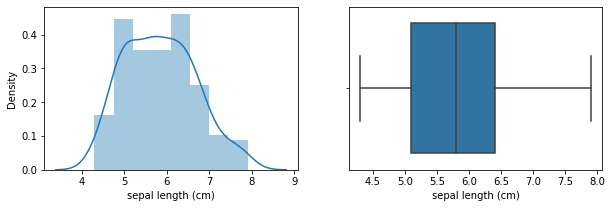

In [ ]:
# Univariate analysis on Sepal length

f = plt.figure(figsize=(10,3))

f.add_subplot(1,2,1)
sns.distplot(df['sepal length (cm)'])

f.add_subplot(1,2,2)
sns.boxplot(df['sepal length (cm)'])


<AxesSubplot:xlabel='sepal width (cm)'>

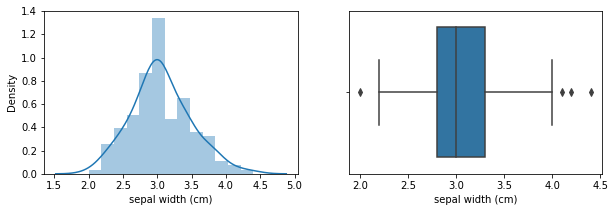

In [ ]:
# Univariate analysis on Sepal Width

f = plt.figure(figsize=(10,3))

f.add_subplot(1,2,1)
sns.distplot(df['sepal width (cm)'])

f.add_subplot(1,2,2)
sns.boxplot(df['sepal width (cm)'])

<AxesSubplot:xlabel='petal width (cm)'>

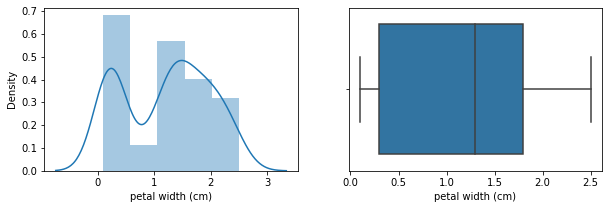

In [ ]:
#Univariate analysis on Petal Width

f = plt.figure(figsize=(10,3))

f.add_subplot(1,2,1)
sns.distplot(df['petal width (cm)'])

f.add_subplot(1,2,2)
sns.boxplot(df['petal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)'>

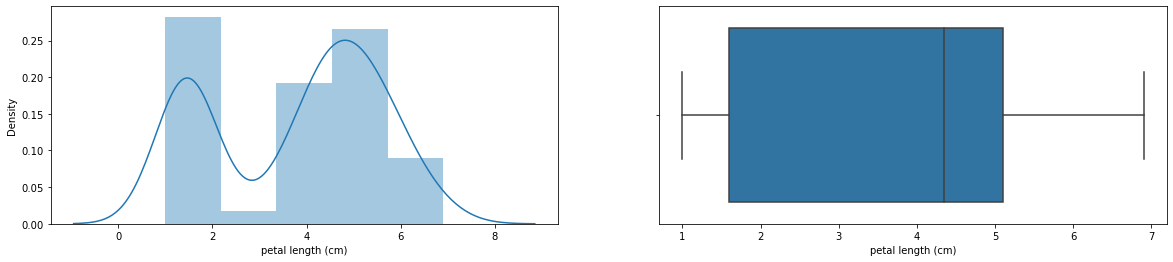

In [ ]:
# Univariate analysis for Petal Length

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['petal length (cm)'])

f.add_subplot(1,2,2)
sns.boxplot(df['petal length (cm)'])

- Sepal length , Petal length and Petal width doesn't have outliers.
- Here Sepal width have outliers.

### KNN Model Development

In [15]:
# Create a KNN object
# ... Your answer here ...
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Display the KNN object
print(knn)


KNeighborsClassifier()


In [ ]:
# Create x and y variables
x = df.drop(columns=['target'])
y = df['target']

60     1
62     1
119    2
68     1
41     0
      ..
16     0
14     0
32     0
33     0
15     0
Name: target, Length: 150, dtype: int64

In [16]:
# Tranform the dataset
# ... Your answer here ...
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature columns (excluding the target)
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))

# Convert back to DataFrame for easy visualization (optional)
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])

# Display the first 5 rows of the transformed dataset
print(df_scaled.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [17]:
# Split data into training and testing
# ... Your answer here ...
# Define features (X) and target (y)
X = df.drop(columns=["target"])  # Feature variables
y = df["target"]  # Target variable

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [19]:
# Train the KNN model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [20]:
# Check model performance
knn.score(X_test,y_test)


1.0

# Model Evaluation

In [21]:
# Total number of Instances
y_test.value_counts()

target
0    10
2    10
1    10
Name: count, dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [ ]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html ---> Cmap colours

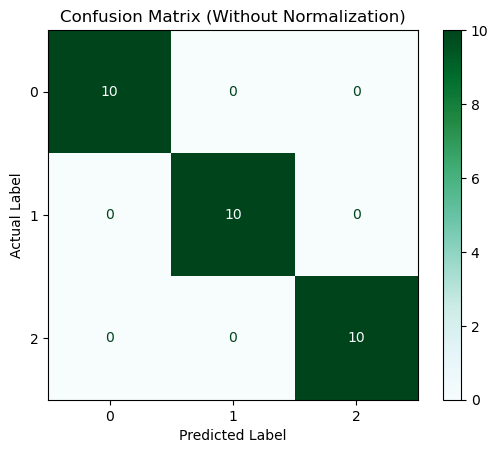

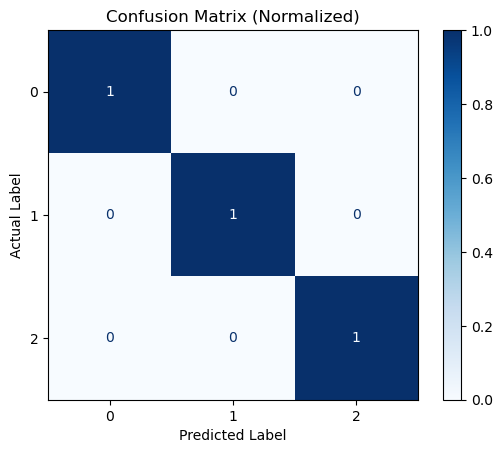

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix without normalization
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, 
                                             display_labels=['0', '1', '2'], 
                                             cmap=plt.cm.BuGn)
plt.title('Confusion Matrix (Without Normalization)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix with normalization
disp_norm = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, 
                                                  display_labels=['0', '1', '2'], 
                                                  cmap=plt.cm.Blues, 
                                                  normalize='true')
plt.title('Confusion Matrix (Normalized)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


### Hyperparameter Tuning Using Grid Search

In [29]:
# List of Hyperparameters to be tested
# n_neighbors = Numbers of neighbors
# leaf_size = reduces the time of execution of KNN
# p = 1:manhattan_distance, 2:Euclidean_distance.

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values for the number of neighbors
    'leaf_size': [10, 20, 30, 40],  # Optimizes search execution time
    'p': [1, 2]  # 1 = Manhattan Distance, 2 = Euclidean Distance
}

# Display the hyperparameter grid
print(param_grid)


{'n_neighbors': [3, 5, 7, 9, 11], 'leaf_size': [10, 20, 30, 40], 'p': [1, 2]}


In [31]:
# Define hyperparameter options
leaf_size = [10, 20, 30, 40]  # Reduces execution time
n_neighbors = [3, 5, 7, 9, 11]  # Number of neighbors
p = [1, 2]  # 1: Manhattan, 2: Euclidean
weights = ['uniform', 'distance']  # Weighting method

# Create a dictionary of hyperparameters
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights=weights)

# Display the dictionary
print(hyperparameters)


{'leaf_size': [10, 20, 30, 40], 'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2], 'weights': ['uniform', 'distance']}


In [33]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_2 = KNeighborsClassifier()

# Define hyperparameter grid
hyperparameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],  # Distance metric: 1 (Manhattan), 2 (Euclidean)
    'weights': ['uniform', 'distance']
}

# Perform Grid Search
grid_search = GridSearchCV(knn_2, hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'leaf_size': 10, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Accuracy: 0.975


In [34]:
# cv is cross validation cv=10
clf = GridSearchCV(knn, hyperparameters, cv=5)


In [36]:
best_model = clf.fit(X,y)

In [37]:
# Best value hyperpaameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

Best leaf_size: 10
Best p: 2
Best n_neighbors: 11
Best weights: distance


In [39]:
# Check model performance

# ... Your answer here ...
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = grid_search.best_estimator_.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [38]:
# Check the params-- old knn model
knn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
#new model with hyperparameter tunning

best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'distance'}